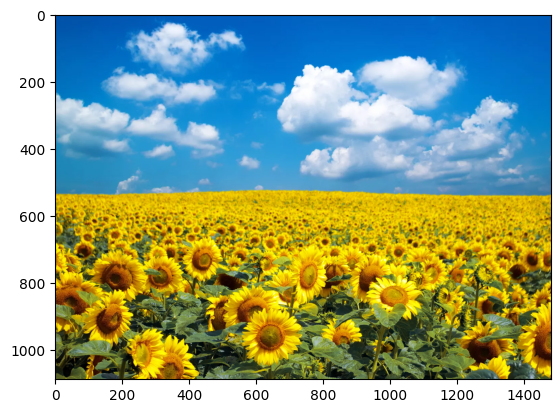

In [229]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Import the image
img = cv2.imread("Input.png", 1) # 0 for grayscale, 1 for color, -1 for color with an alpha channel

# Convert from bgr to rgb
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img)

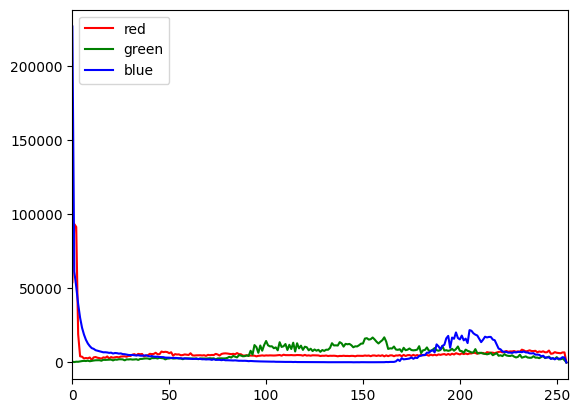

In [230]:
# Create an RGB histogram of the whole image
# First plot for the red channel
hist = cv2.calcHist([img], [0], None, [256], [0, 255])
plt.plot(hist, color = 'red')
plt.xlim([0, 256])

# Second plot for the green channel
hist = cv2.calcHist([img], [1], None, [256], [0, 255])
plt.plot(hist, color = 'green')
plt.xlim([0, 256])

# Third plot the the blue channel
hist = cv2.calcHist([img], [2], None, [256], [0, 255])
plt.plot(hist, color = 'blue')
plt.xlim([0, 256])

# Add a legend
plt.legend(('red','green','blue'), loc = 'upper left')

# Plot the histogram
plt.show()

In [231]:
# Brightness and contrast function
# Output = alpha * input + beta

def adjust_brightness_contrast(image_array, alpha, beta):
    # Convert to floating point to avoid overflow and underflow
    temp = image_array.astype('float32')

    # Adjust contrast
    temp *= alpha

    # Adjust brightness
    temp += beta

    # Clip values to be in the range [0, 255]
    temp = np.clip(temp, 0, 255)

    return temp.astype('uint8')

# Adjust the image with brightness and contrast to fit the complete tonal range
adjusted_img = adjust_brightness_contrast(img, .5, 40)

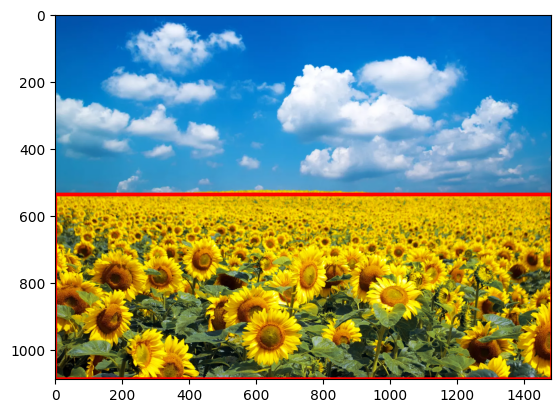

In [232]:
# Rectangle OpenCv function
# cv2.rectangle(img, top_left, bottom_right, rect_color, thickness)

# Top left corner of rectangle
top_left = (0, 537) # change values depending on the picture

# Bottom right corner of rectangle
bottom_right = (1480, 1087) # change values depending on the picture

# Color
rect_color = (255, 0, 0)

# Thickness
thickness = 10

# Rectangle function
img_rect = cv2.rectangle(img, top_left, bottom_right, rect_color, thickness)

# Plot image
plt.imshow(img_rect)

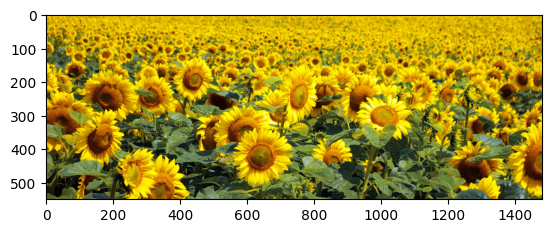

In [233]:
# Paste the rectangle coordinates for reference

# Top left corner of rectangle
# top_left = (0, 537) # change values depending on the picture

# Bottom right corner of rectangle
# bottom_right = (1480, 1087) # change values depending on the picture

# Import the image
img = cv2.imread('Input.png')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_masked = img[537:1087, 0:1480] # [top_left_y:bottom_right_y, top_left_x:bottom_left_x], change values depending on the picture

plt.imshow(img_masked)

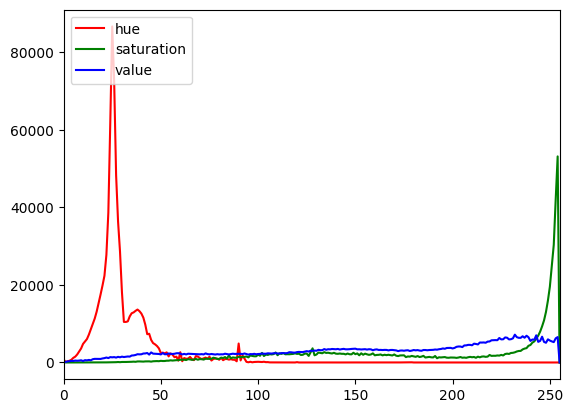

In [234]:
# Create a HSV histogram of the whole image
img_masked = cv2.cvtColor(img_masked, cv2.COLOR_RGB2HSV)

# Hue
hist = cv2.calcHist([img_masked],[0],None,[256],[0,255])
# Add histogram to the plot
plt.plot(hist, color='red')
# Limit the plot range on the x-axis to 256 values
plt.xlim([0,255])

# Saturation
hist = cv2.calcHist([img_masked],[1],None,[256],[0,255])
# Add histogram to the plot
plt.plot(hist, color='green')
# Limit the plot range on the x-axis to 256 values
plt.xlim([0,255])

# Value
hist = cv2.calcHist([img_masked],[2],None,[256],[0,255])
# Add histogram to the plot
plt.plot(hist, color='blue')
# Limit the plot range on the x-axis to 256 values
plt.xlim([0,255])

# Add a legend
plt.legend(('hue','saturation','value'), loc = 'upper left')

# Plot the histogram
plt.show()

(1087, 1480)


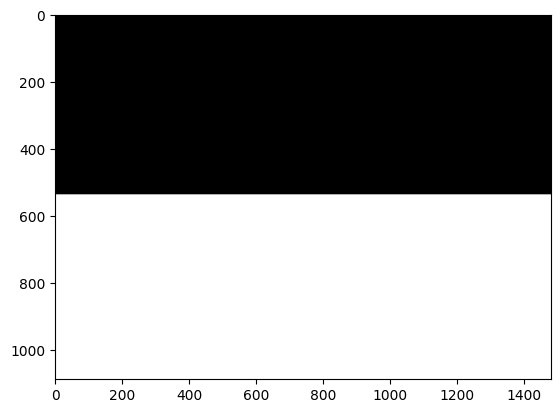

In [235]:
# Create an empty 2D array filled with zeros the same shape as the image, define the data type as uint8
mask = np.zeros(img.shape[:2], np.uint8)

# Set the mask to white (black is 0 and white is 255 in 8 bit color)
mask[537:1087, 0:1480] = 255 # change values depending on the picture

# Image shape to confirm it's the same size as the image
print(mask.shape)

# Plot the mask, let matplotlib know that it should only contain gray values
plt.imshow(mask, cmap="gray")

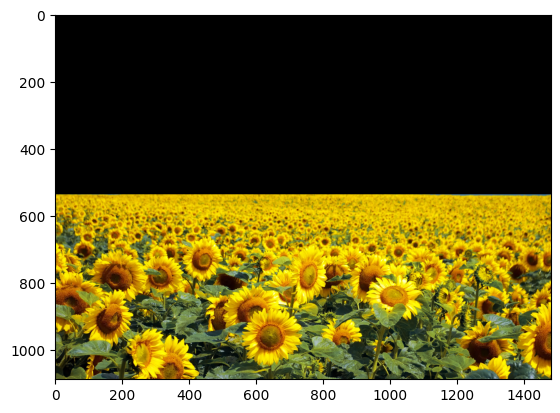

In [236]:
# Add the mask to the image

# Import the image again
img = cv2.imread("Input.png")

# Convert the image to RGB to plot it
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# The bitwise AND operator ( & ) compares each bit of the first operand to the corresponding bit of the second operand.
# If both bits are 1, the corresponding result bit is set to 1. Otherwise, the corresponding result bit is set to 0.
# First image to compare. Second image to compare. Mask to use.
img_masked = cv2.bitwise_and(img, img, mask=mask)

# Plot the masked image
plt.imshow(img_masked)